# Exploring the Factors Affecting House Prices: An In-Depth Analysis of the House price Dataset

# Introduction
Welcome to this exploratory data analysis (EDA) notebook where we will explore the Ames Housing dataset. The Ames Housing dataset contains detailed information about various houses in Ames, Iowa, and their corresponding sale prices. The dataset consists of 79 explanatory variables describing (almost) every aspect of residential homes such as lot size, number of bedrooms, year built, garage size, and more. With such a vast array of information, we can perform a thorough analysis to understand the factors that impact the sale price of houses in Ames, Iowa. In this notebook, we will use Python and its data analysis libraries to explore, visualize, and analyze the data to gain insights into the housing market in Ames. By the end of this notebook, you will have a comprehensive understanding of how to perform an EDA, visualize and analyze data.

# Setup :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Exploration
We start by loading the dataset and examining the first few rows:

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


##### After examining the dataset, we can perform some basic EDA to get a better understanding of the features and their relationships with the target variable (SalePrice). Here are some suggested steps:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data preprocessing :
#### Handling missing values

Total missing values in the dataset:  6965

Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<AxesSubplot:>

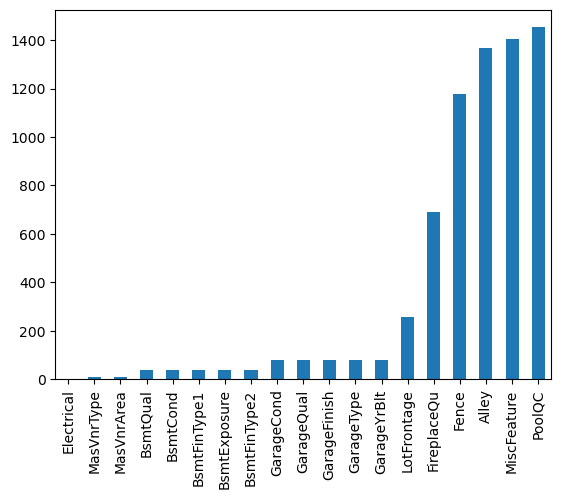

In [6]:
# Check for missing values in the dataset
missing_values_count = df.isnull().sum()

# Print the total number of missing values
print("Total missing values in the dataset: ", missing_values_count.sum())

# Print the columns with missing values and their total count
print("\nColumns with missing values:\n", missing_values_count[missing_values_count > 0])

missing = missing_values_count[missing_values_count > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

From the bar plot, we can see that there are several columns with missing values. We will handle them in the following way.
* For columns where the percentage of missing values is very low (less than 5%), we will fill the rows containing    missing values with mean,median and mode.
* For columns where the percentage of missing values is high, we will drop the columns.

In [7]:
# Handling missing values in columns with more than 5% missing values.
# Drop columns which have high missing values.

df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [8]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

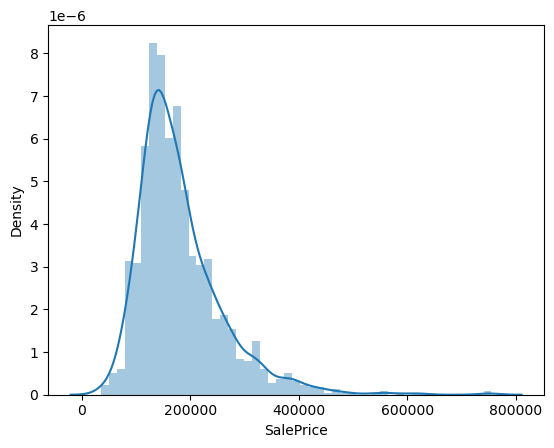

In [9]:
# Visualize the distribution of the target variable using a histogram:

sns.distplot(df['SalePrice'])
plt.show()

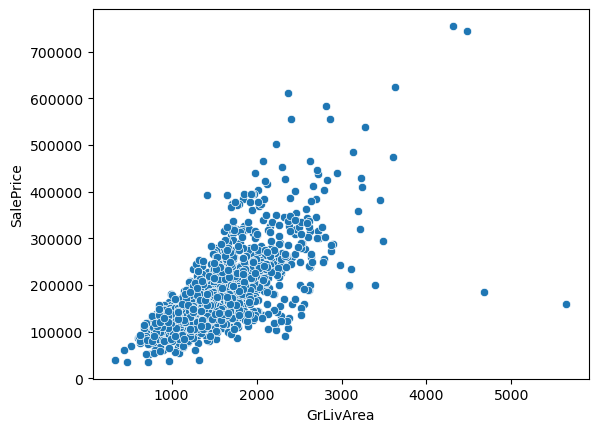

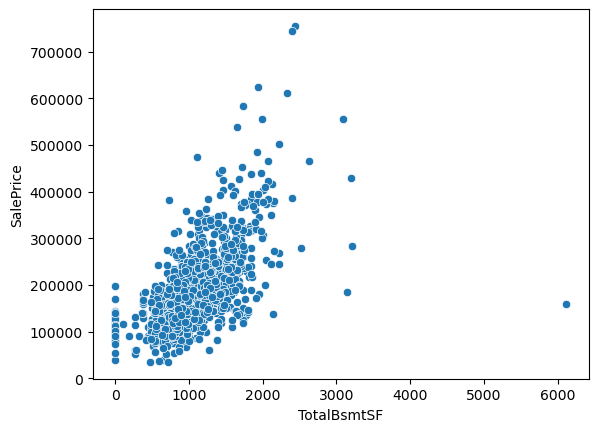

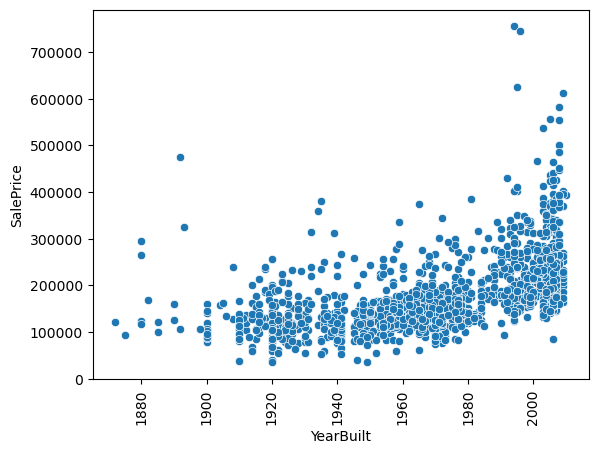

In [10]:
# Visualize the relationship between the target variable and the numerical features using scatterplots:

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.show()

the scatterplots give us a good idea of the relationship between the independent variables and the sale price. They also highlight some outliers that might be worth investigating further to see if there are any other factors that might be influencing the sale price.

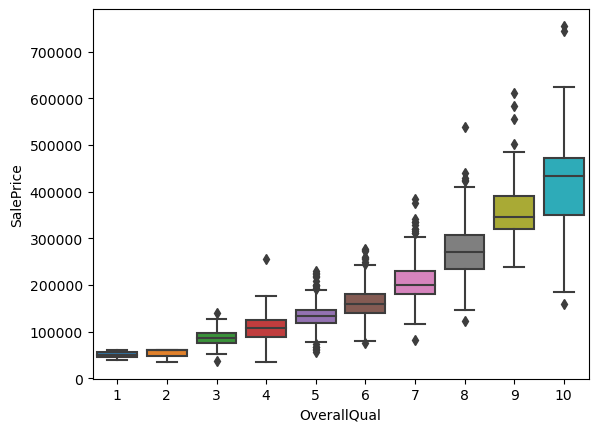

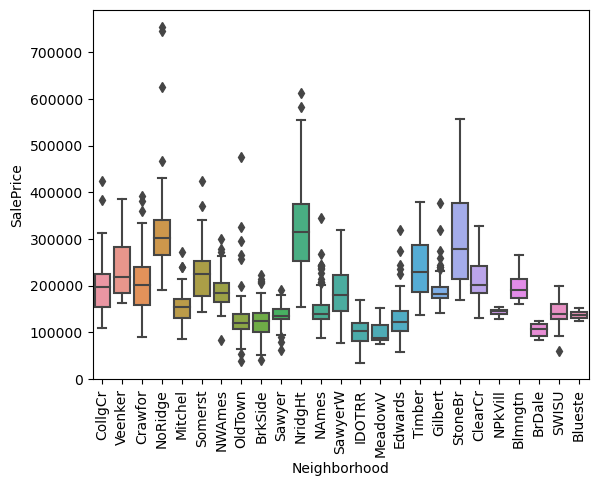

In [11]:
# Visualize the relationship between the target variable and the categorical features using boxplots:

sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.show()

Overall, both boxplots provide useful insights into the factors that affect the sale price of a house. They suggest that the overall quality of the house and the neighborhood where it is located are important predictors of its sale price.

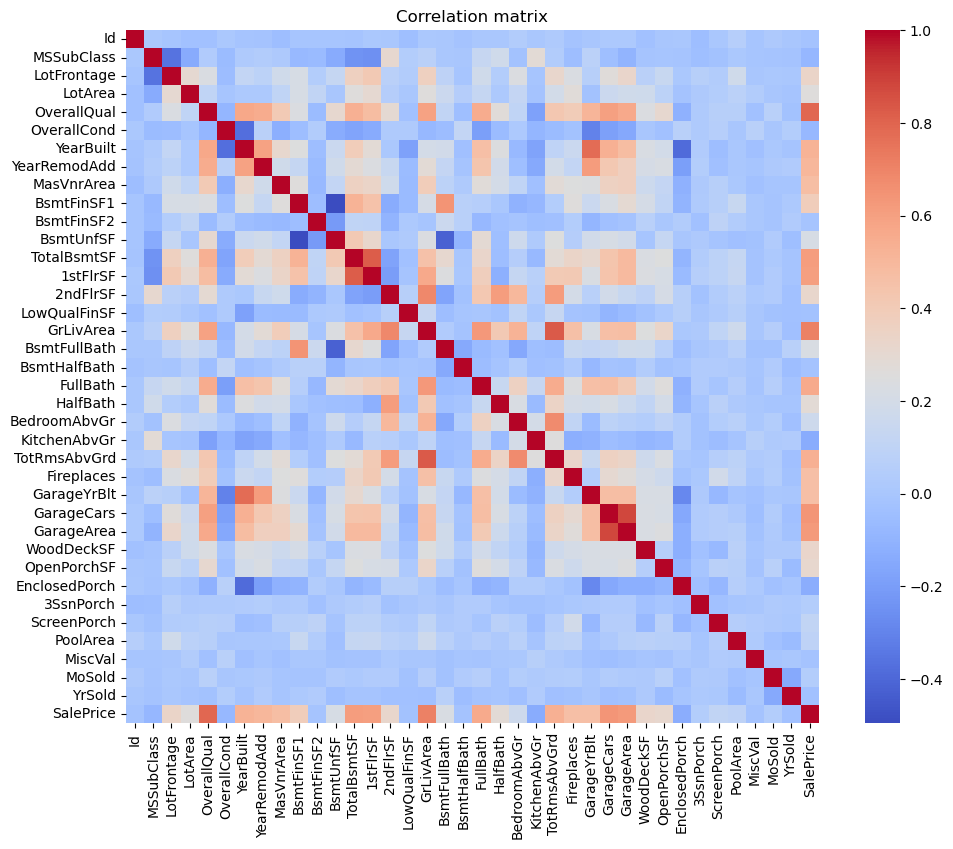

In [12]:
# Compute the correlation matrix and visualize it using a heatmap:

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap using pandas
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation matrix")
plt.show()

The resulting heatmap shows the correlation values between each pair of numerical features in the dataset. Darker colors represent higher correlation values, while lighter colors represent lower correlation values. For example, we can see that OverallQual has a strong positive correlation with SalePrice, while BsmtFinSF1 has a moderate positive correlation with SalePrice. The diagonal line represents the correlation of each feature with itself, which is always 1.

We can also see that some variables are highly correlated with each other. For example, GarageCars and GarageArea have a very strong positive correlation, which makes sense since larger garages can typically accommodate more cars.

Overall, this heatmap provides a useful overview of the correlations between our numerical variables and can help guide feature selection or engineering decisions in our machine learning model.

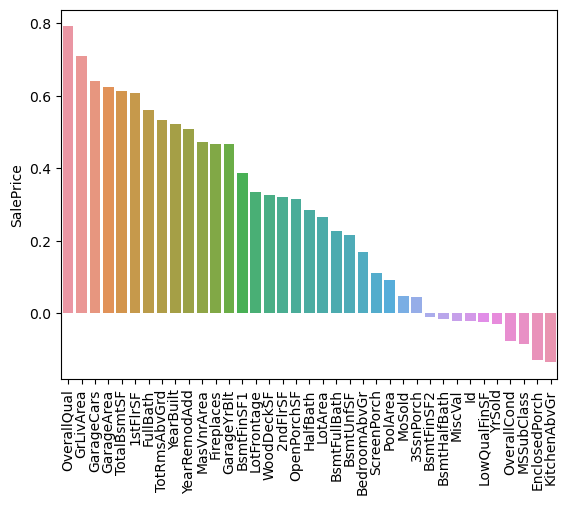

In [13]:
# Compute the correlation between the target variable and the numerical features and visualize it using a bar chart:

corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)[1:]
sns.barplot(x=corr_with_target.index, y=corr_with_target)
plt.xticks(rotation=90)
plt.show()


From the bar plot, we can see that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, and YearBuilt are the features that have the strongest positive correlation with the target variable. On the other hand, features like KitchenAbvGr, EnclosedPorch, and MssubClass have a negative correlation with the target variable.

Overall, these visualizations provide us with a better understanding of the relationships between different features and the target variable, which can help us make more informed decisions when selecting features for our predictive model.

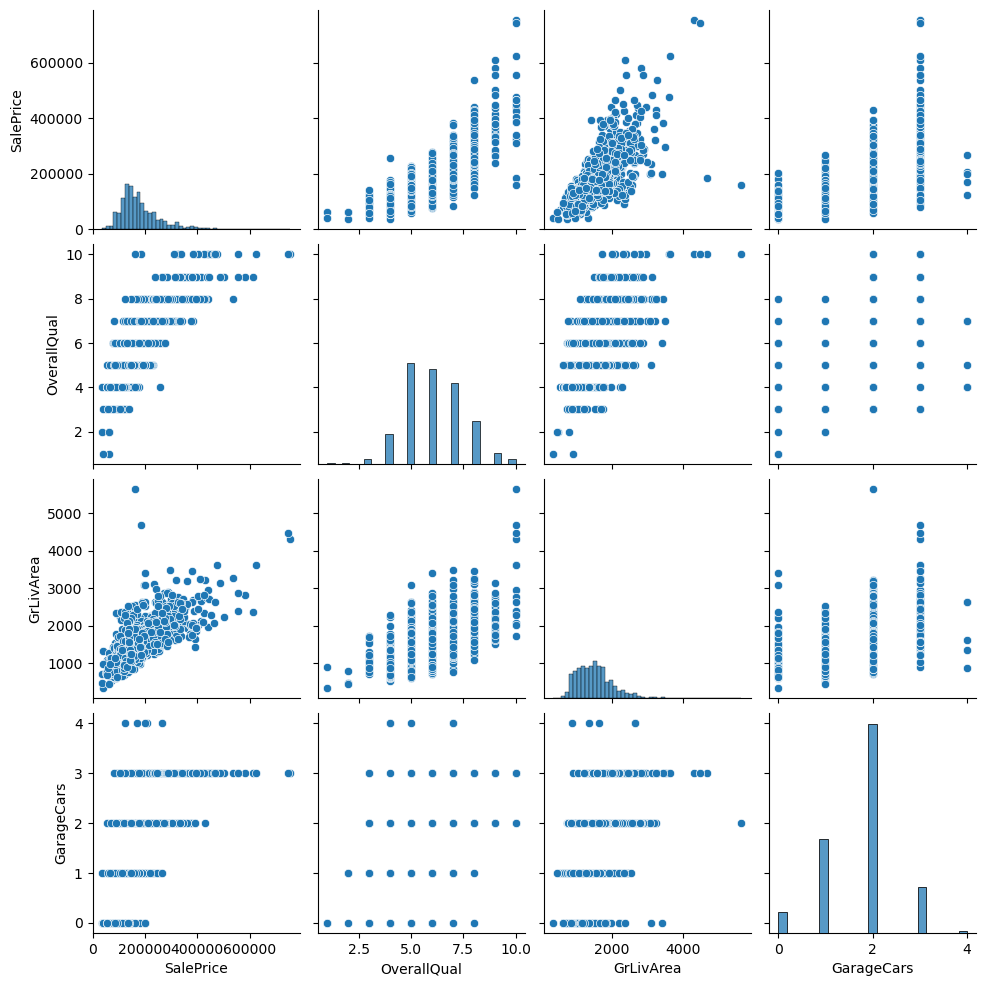

In [14]:
# Visualizing the Correlation between Sale Price and Key Features using Pairplots

sns.pairplot(df, vars=["SalePrice", "OverallQual", "GrLivArea", "GarageCars"])
plt.show()

From the pair plot, we can see that 'SalePrice' has a strong positive correlation with 'OverallQual' and 'GrLivArea'. This suggests that houses with higher overall quality and larger above ground living area tend to have higher sale prices. Additionally, we can see that 'GarageCars' also has a moderate positive correlation with 'SalePrice', indicating that houses with more garage capacity also tend to have higher sale prices.

Overall, the pair plot provides a quick and easy way to visualize the relationships between multiple variables, which can be helpful in identifying potential patterns and correlations in the data.

# Feature Engineering:
In this step, we will create new features or transform existing features to improve the performance of our models.

In [15]:
# Create a new feature called TotalSF
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Create a new feature called TotalBath
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

TotalSF represents the total square footage of a house, including the basement, first and second floors. This feature can potentially capture the overall size of a house and provide insight into its value. The feature was created by adding the values of the TotalBsmtSF, 1stFlrSF, and 2ndFlrSF features.

TotalBath represents the total number of bathrooms in a house. This feature takes into account the number of full baths, half baths, and basement full and half baths. The feature was created by adding the values of FullBath, 0.5HalfBath, BsmtFullBath, and 0.5BsmtHalfBath.

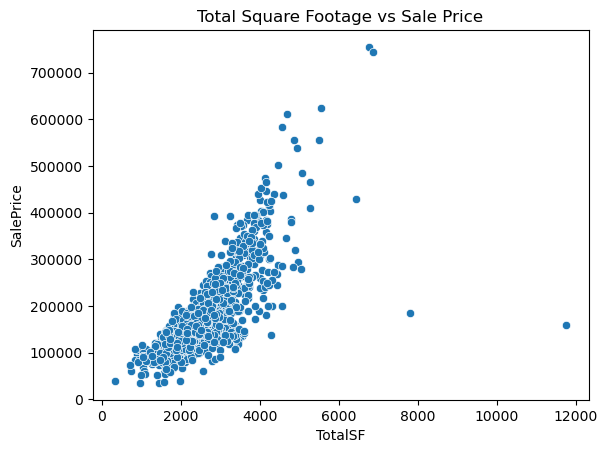

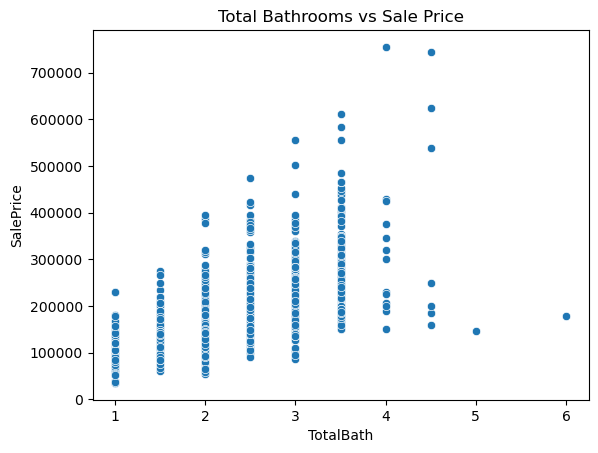

In [16]:
# Scatterplot of TotalSF vs SalePrice
sns.scatterplot(x='TotalSF', y='SalePrice', data=df)
plt.title('Total Square Footage vs Sale Price')
plt.show()

# Scatterplot of TotalBath vs SalePrice
sns.scatterplot(x='TotalBath', y='SalePrice', data=df)
plt.title('Total Bathrooms vs Sale Price')
plt.show()


### TotalSF (total square footage) vs SalePrice
As expected, we can see a positive linear relationship between the two variables, indicating that as the total square footage of a house increases, its sale price also tends to increase. However, there are some outliers that are worth exploring further, as they seem to have high square footage but relatively low sale prices.

### TotalBath (total number of bathrooms) vs SalePrice
Similar to TotalSF, we can see a positive linear relationship between the two variables, indicating that as the total number of bathrooms in a house increases, its sale price also tends to increase. However, we can also see that there are some houses with relatively few bathrooms but high sale prices, suggesting that there are other factors influencing the sale price beyond just the number of bathrooms.

Overall, these scatterplots provide valuable insights into the relationship between TotalSF/TotalBath and SalePrice and can help inform our feature engineering and modeling decisions.

## Identify outliers
Finally, let's identify any outliers in the dataset. We can create scatterplots of each numerical variable against the sale price to see if there are any observations that are far from the general trend.

<AxesSubplot:xlabel='SalePrice'>

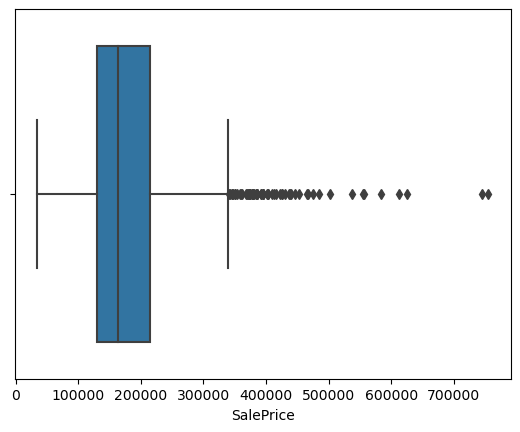

In [17]:
# Check for outliers in SalePrice
sns.boxplot(x=df['SalePrice'])

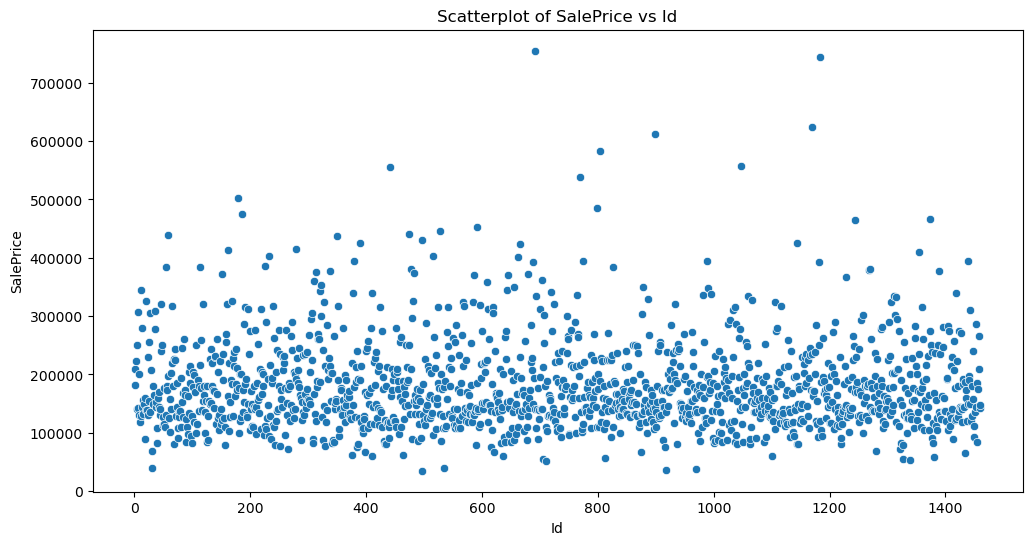

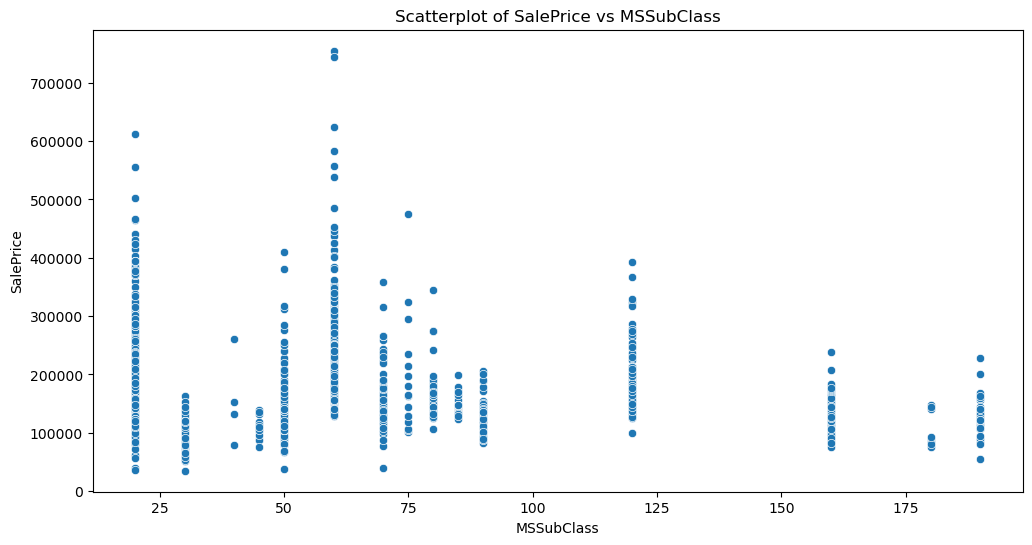

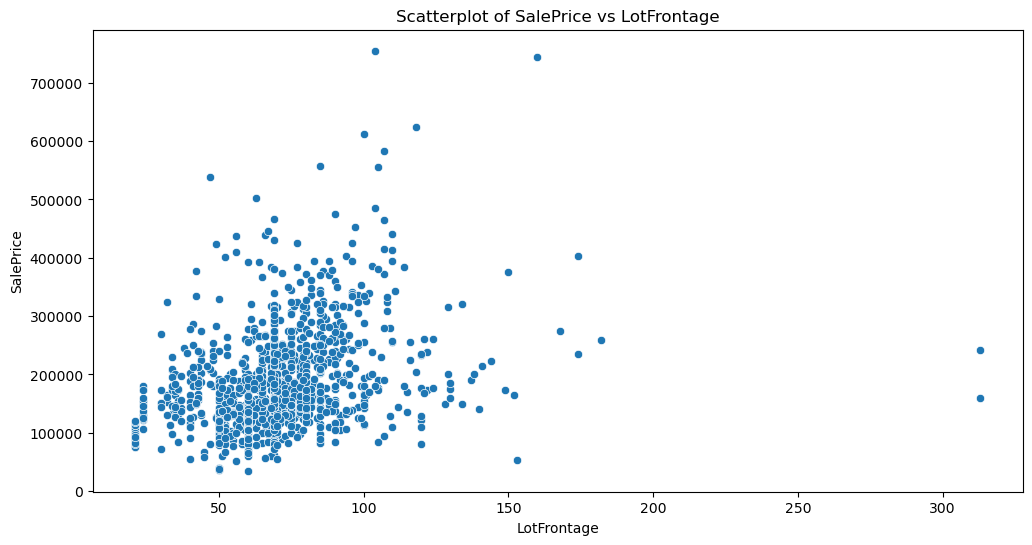

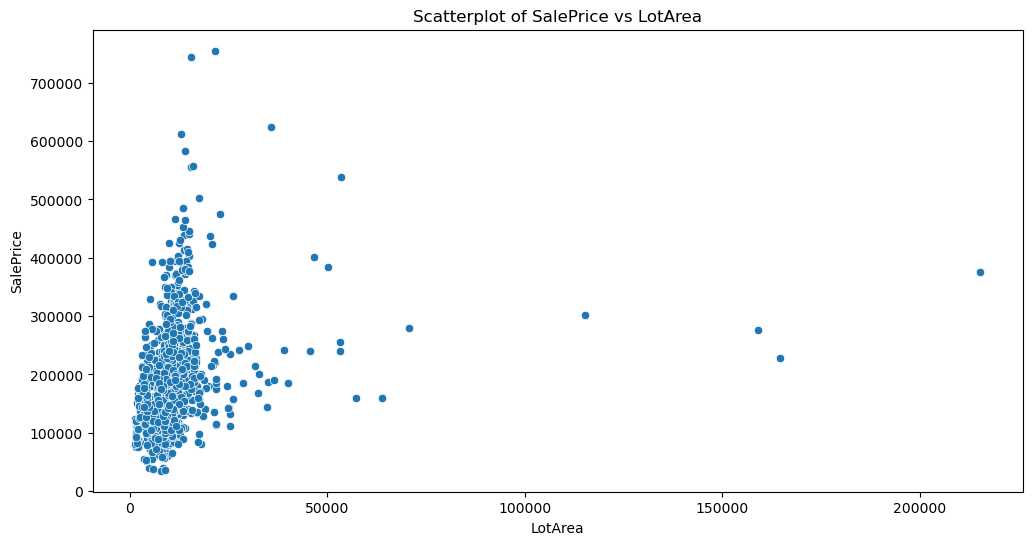

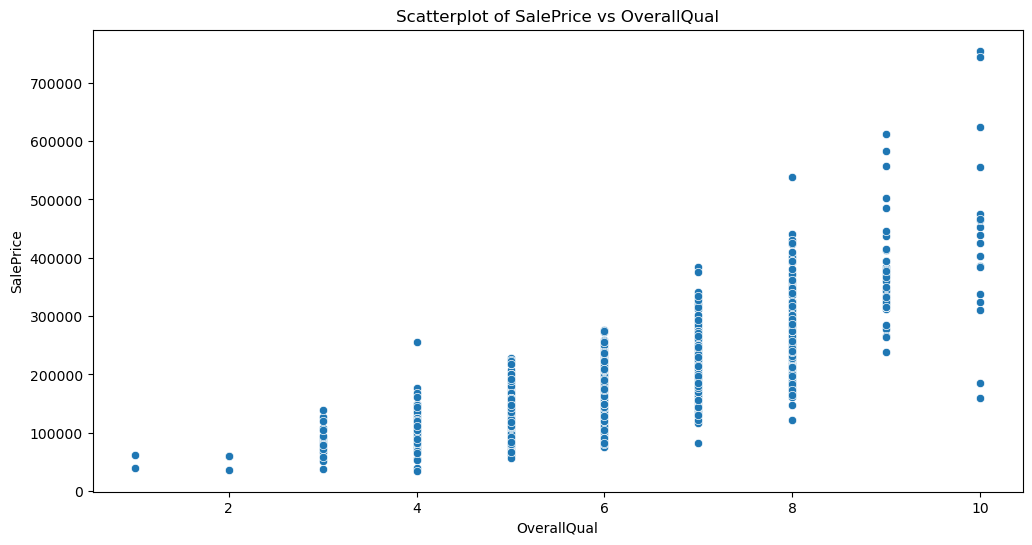

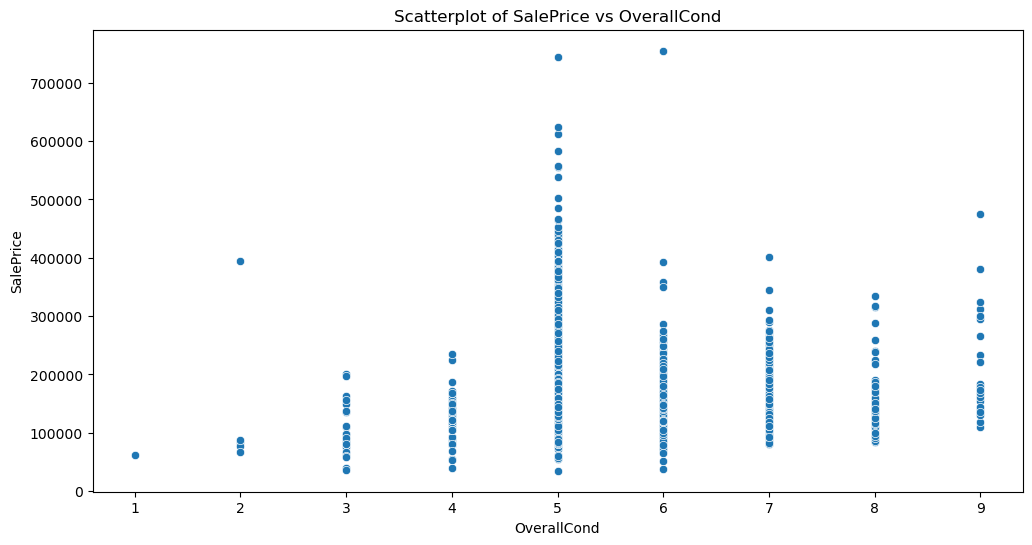

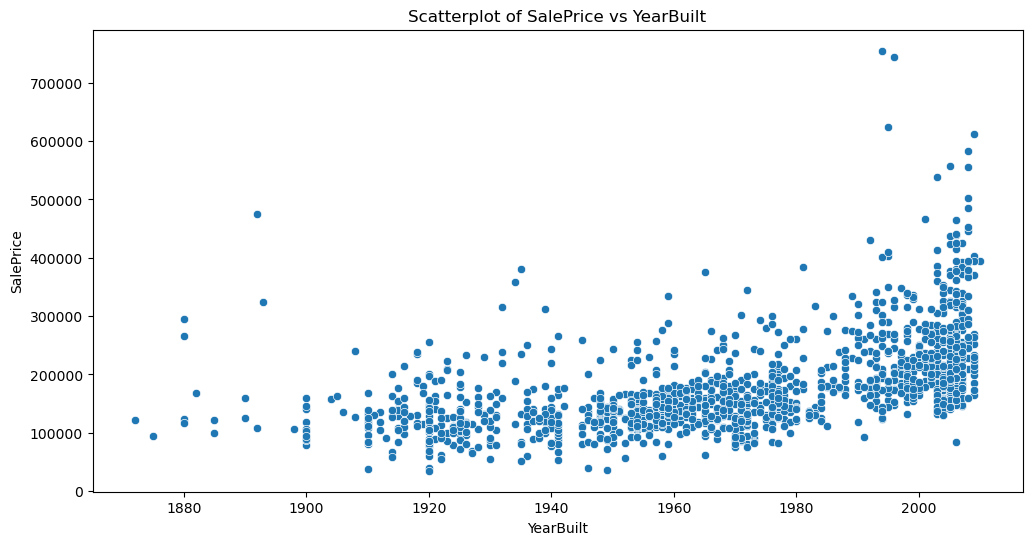

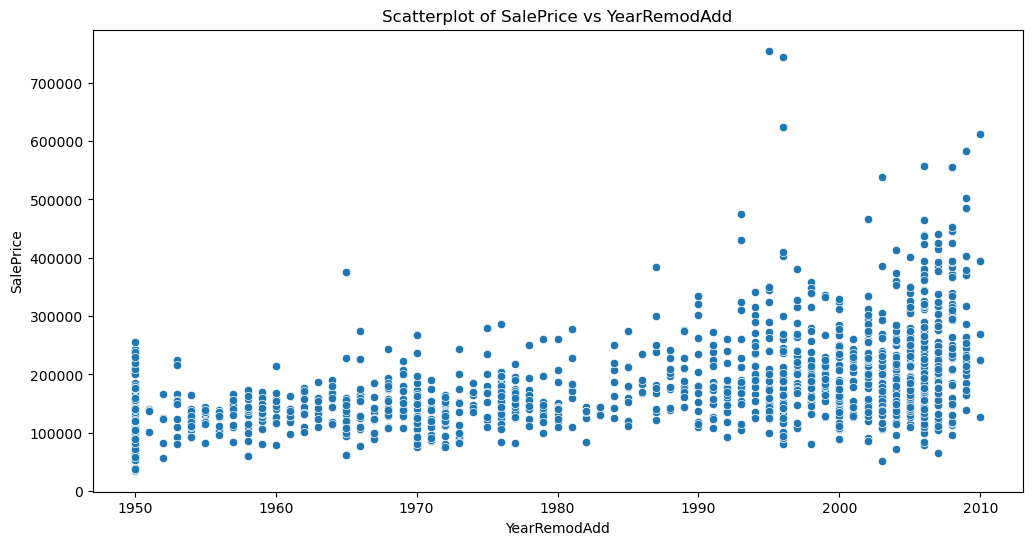

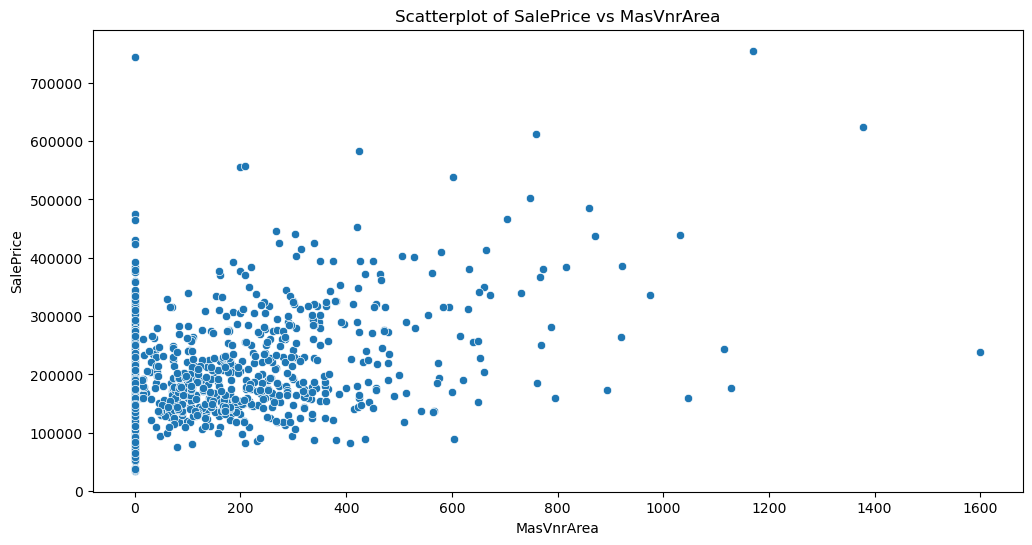

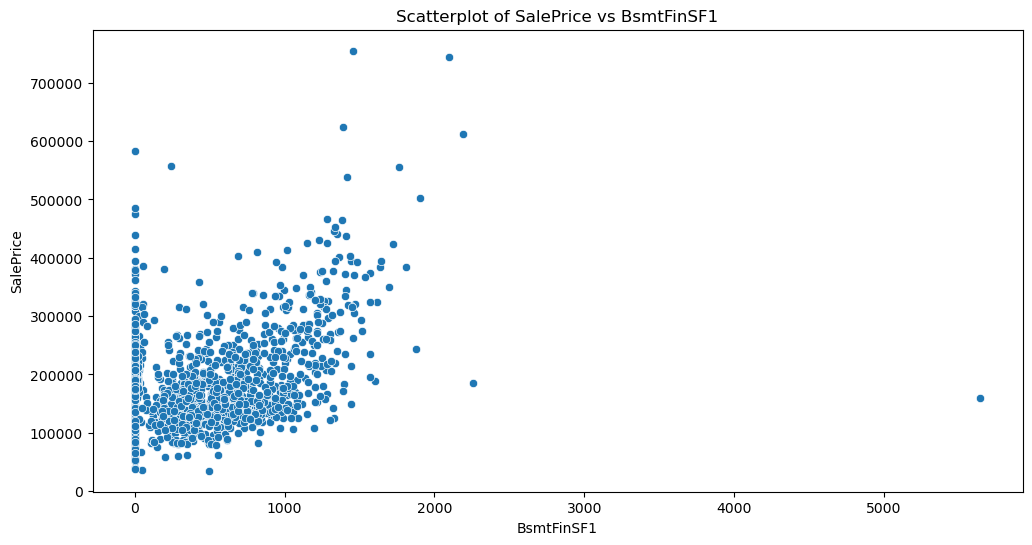

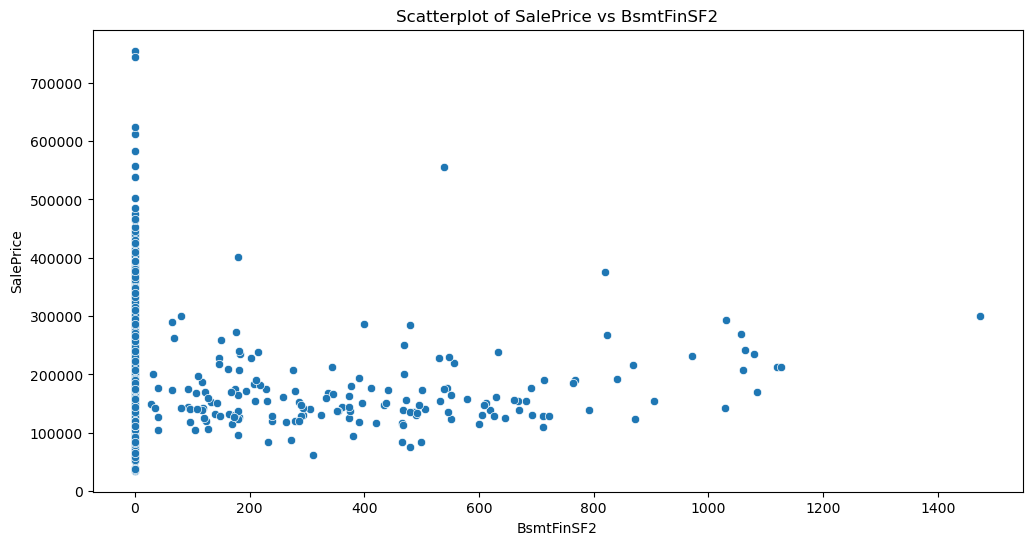

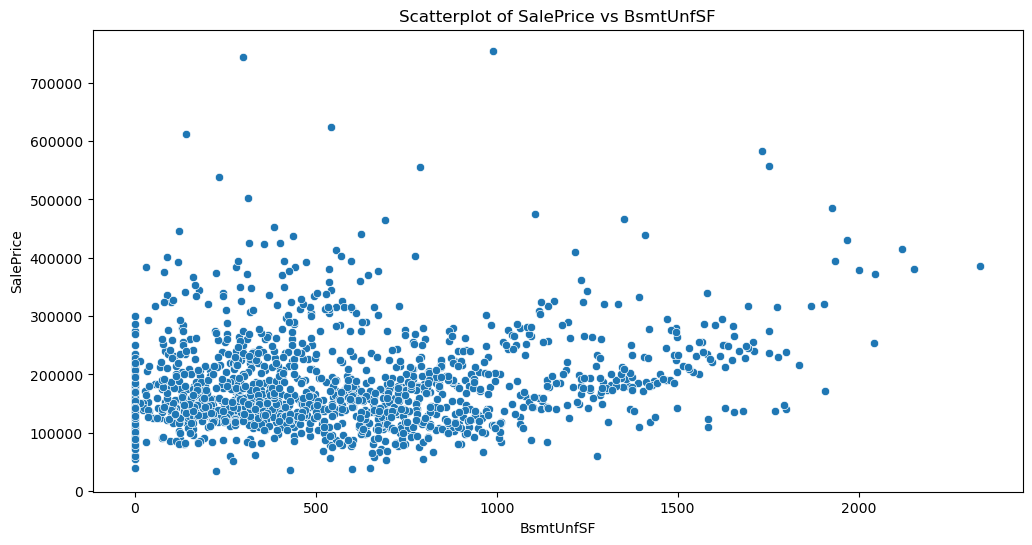

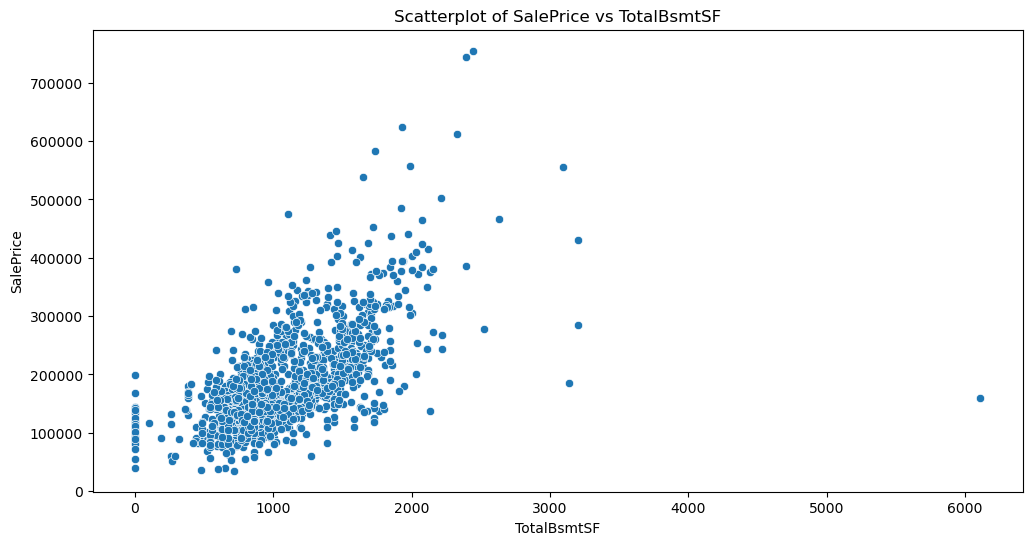

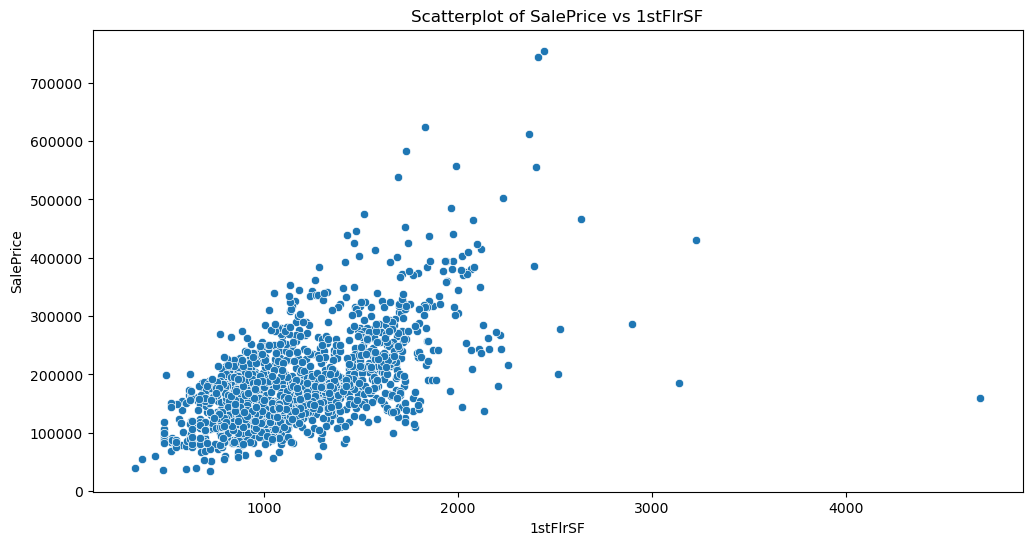

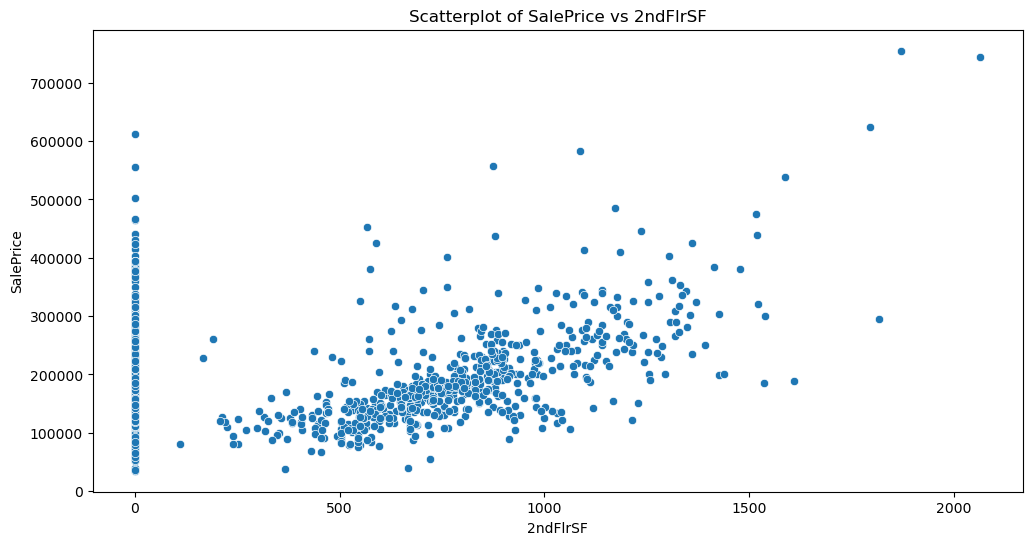

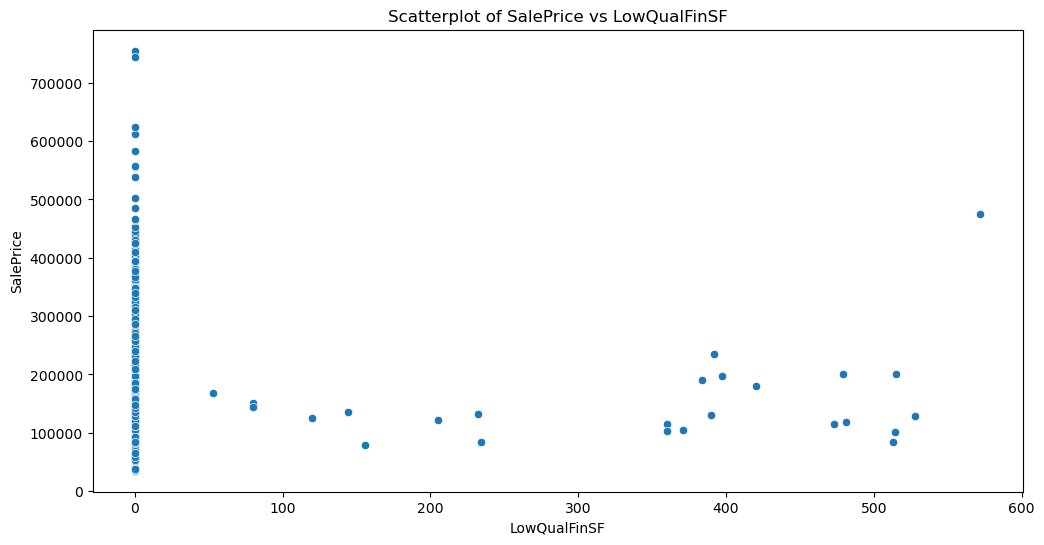

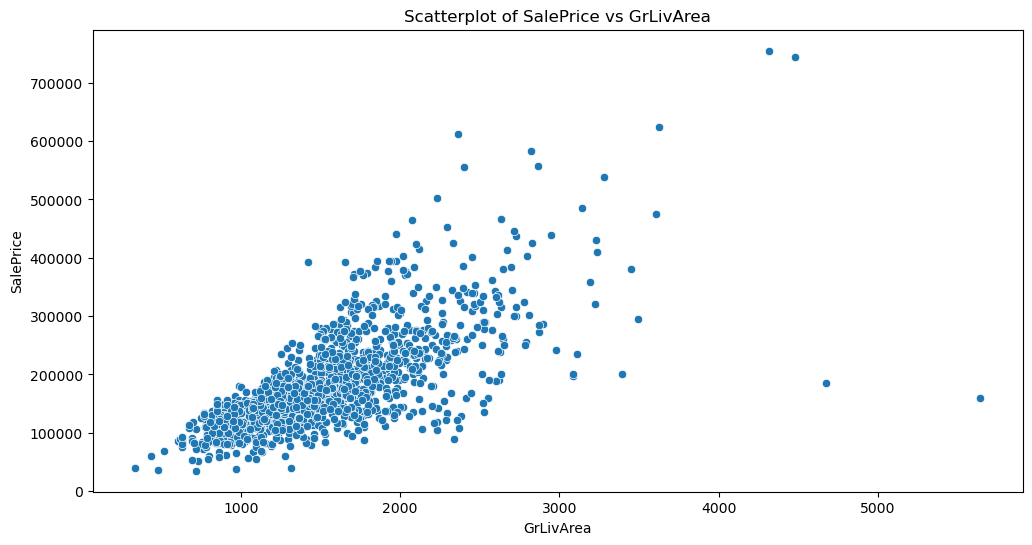

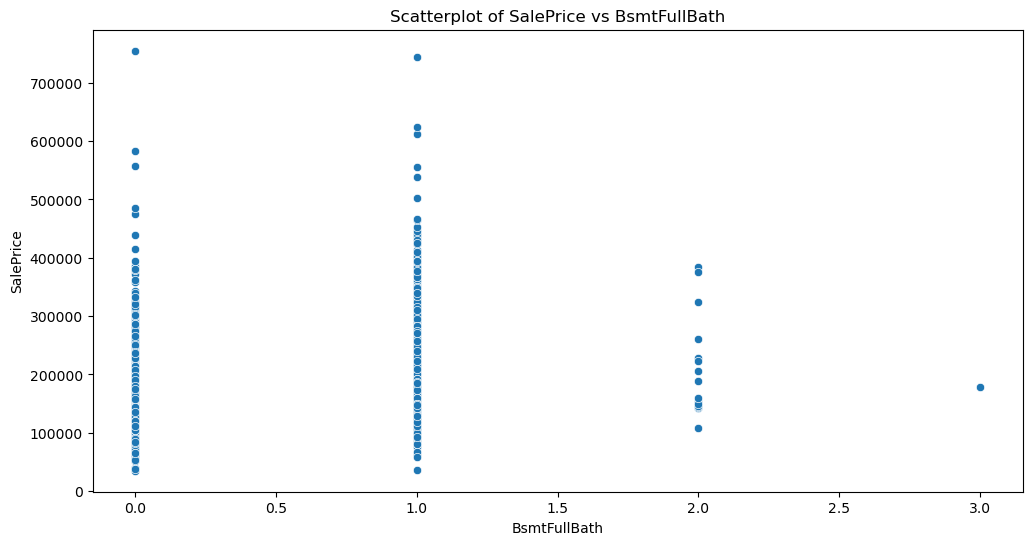

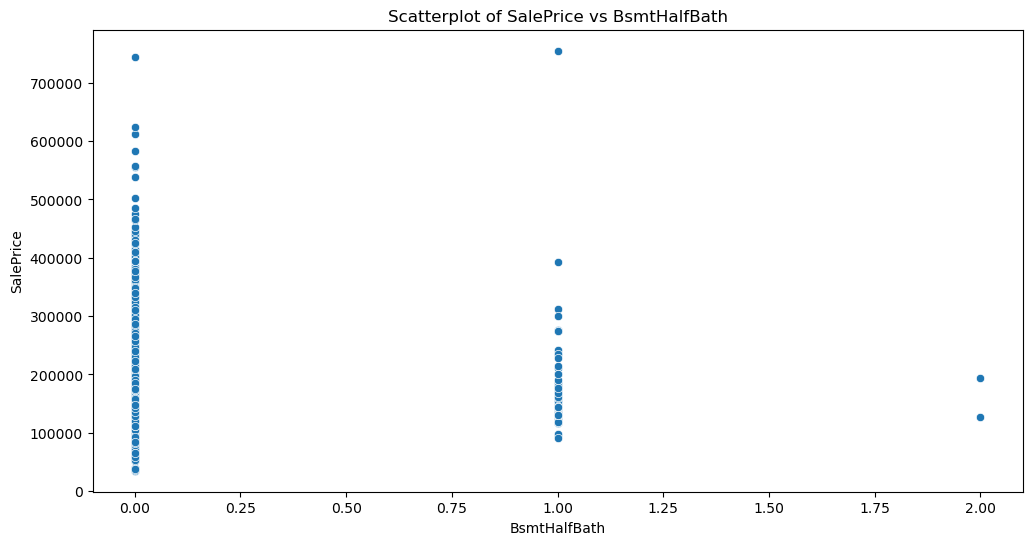

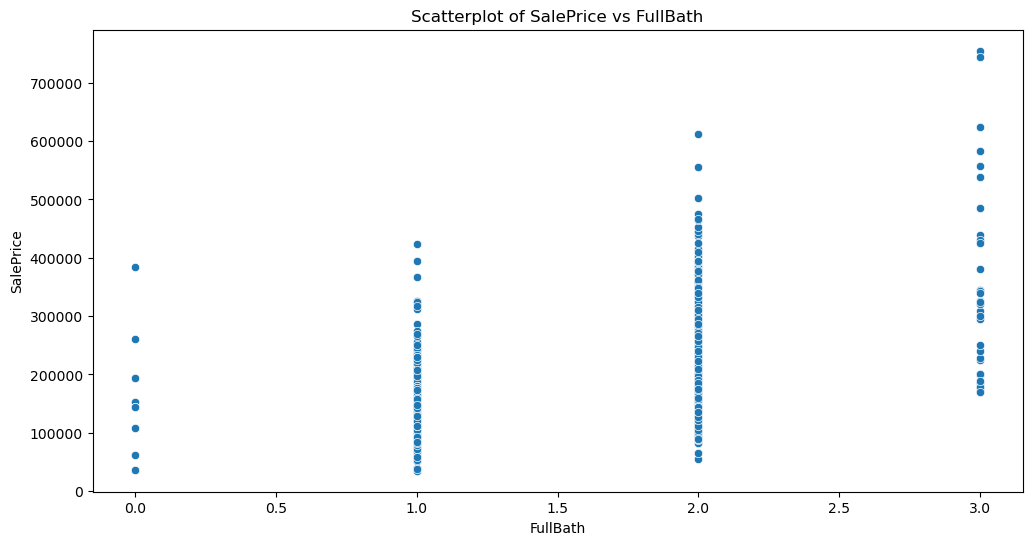

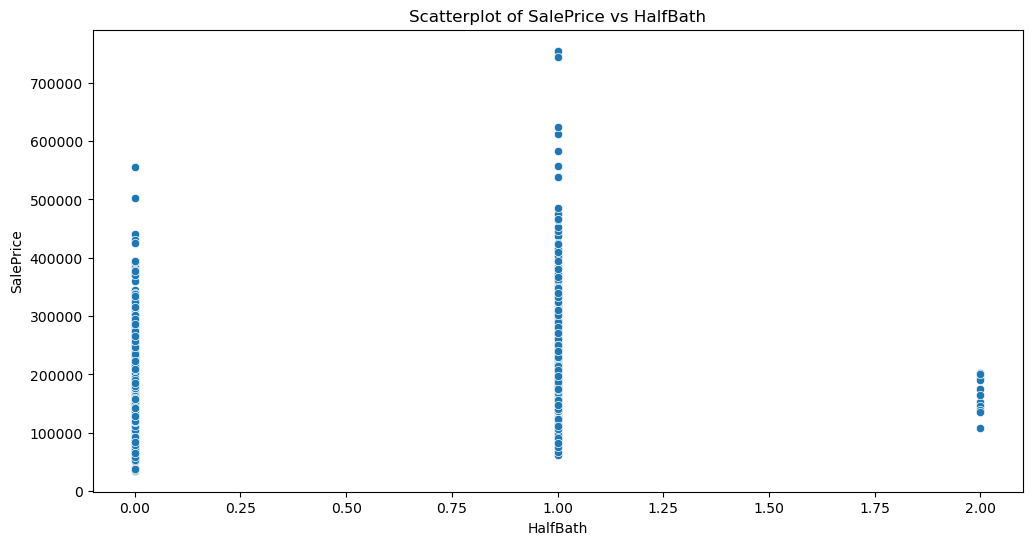

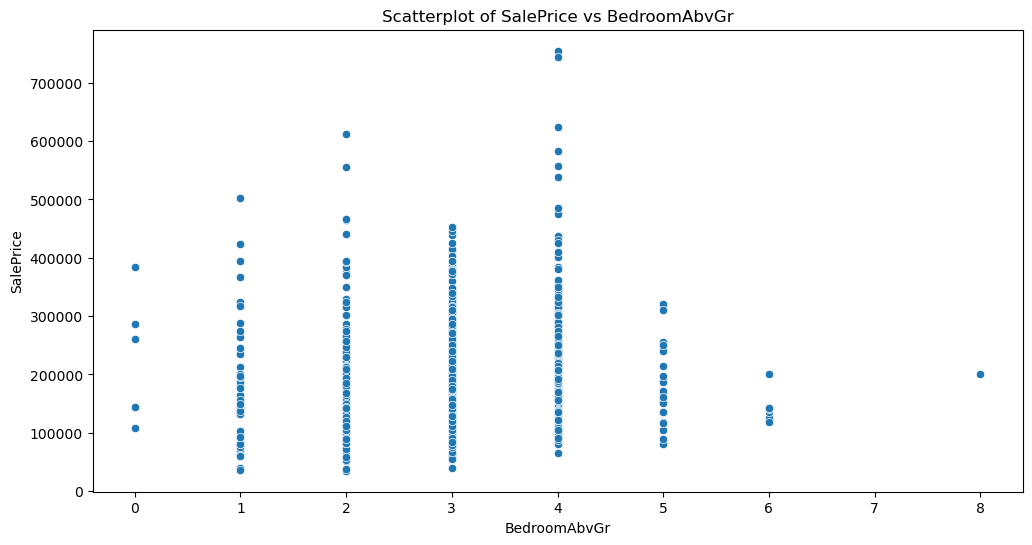

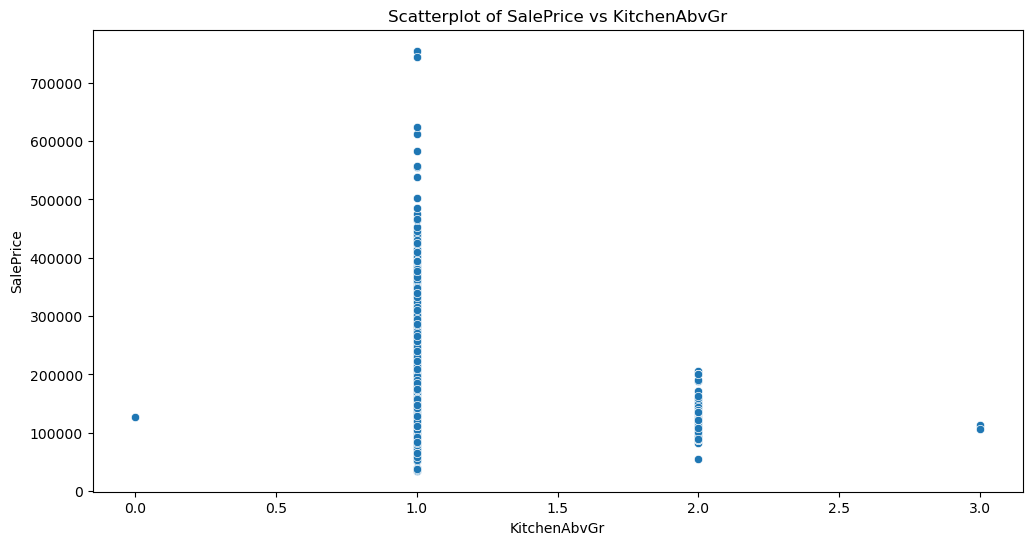

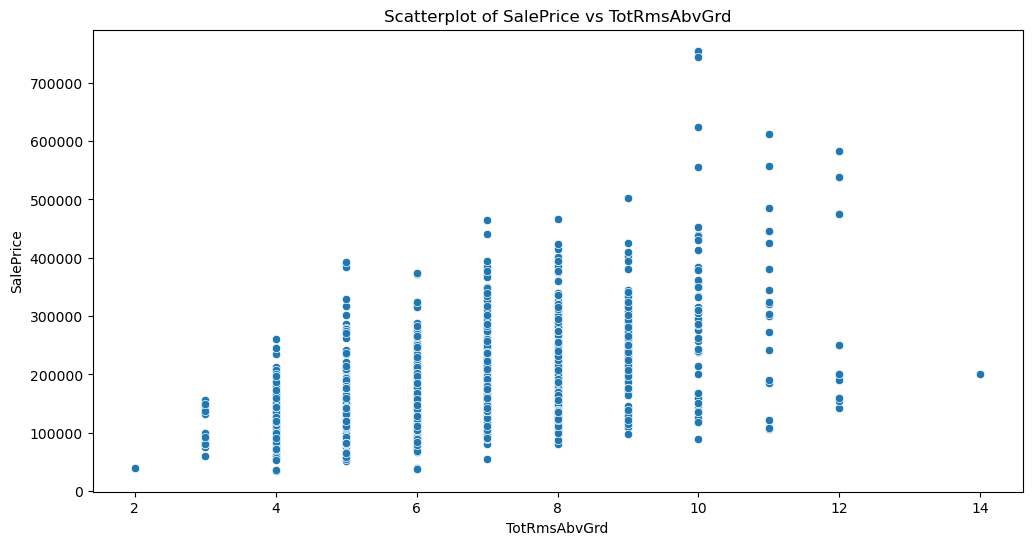

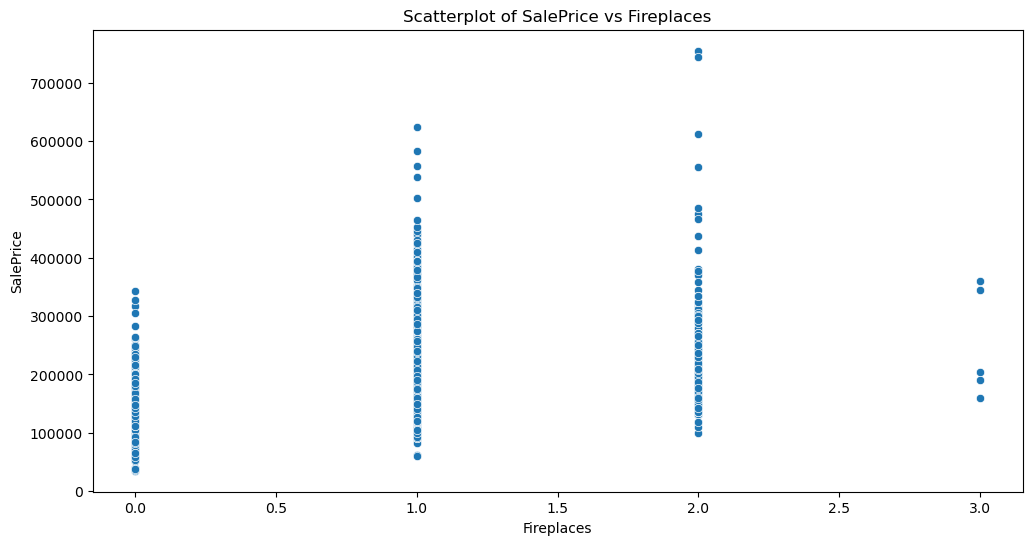

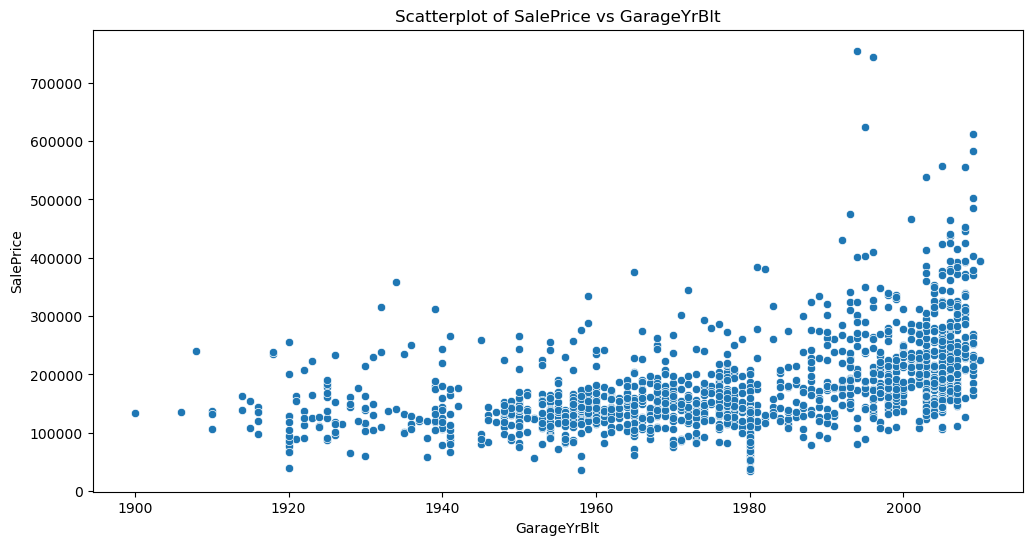

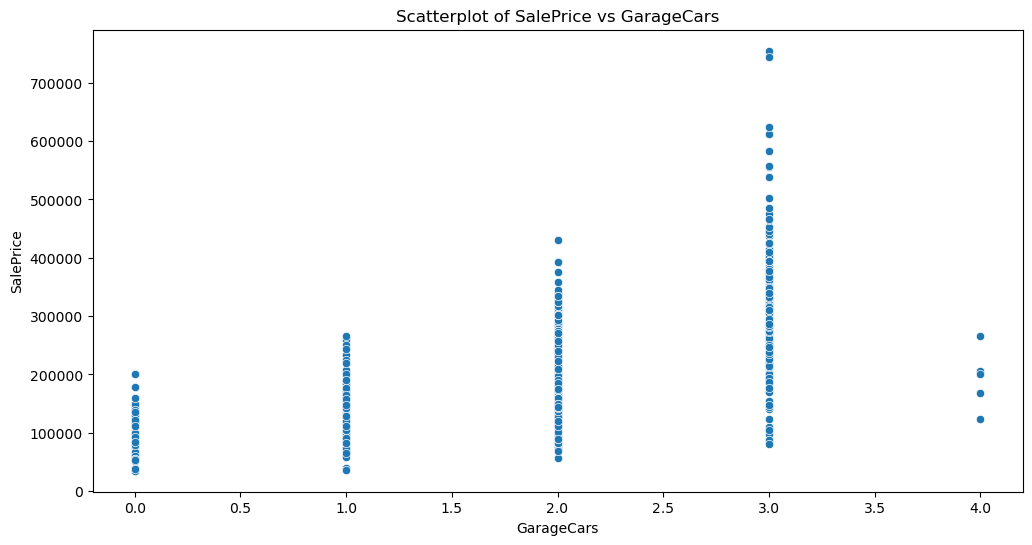

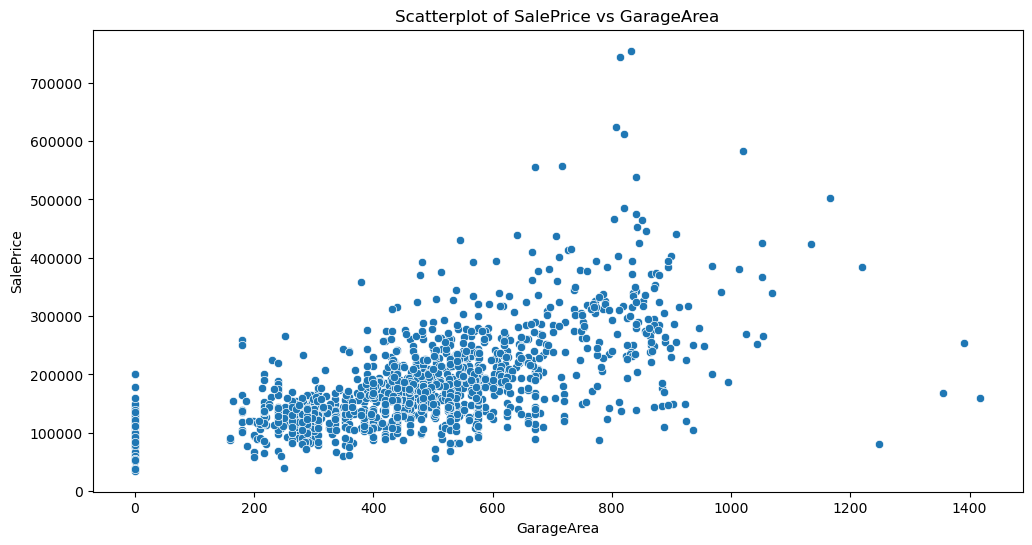

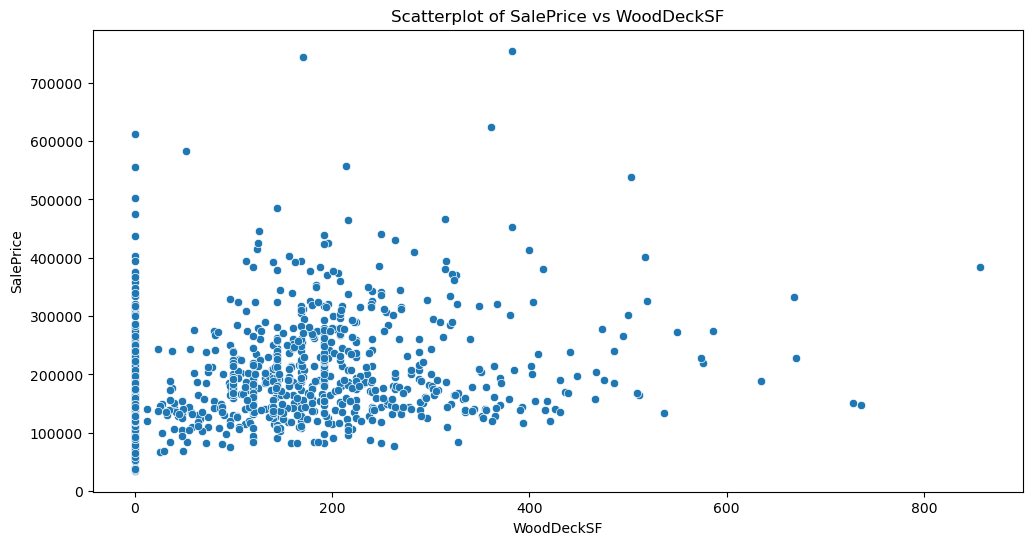

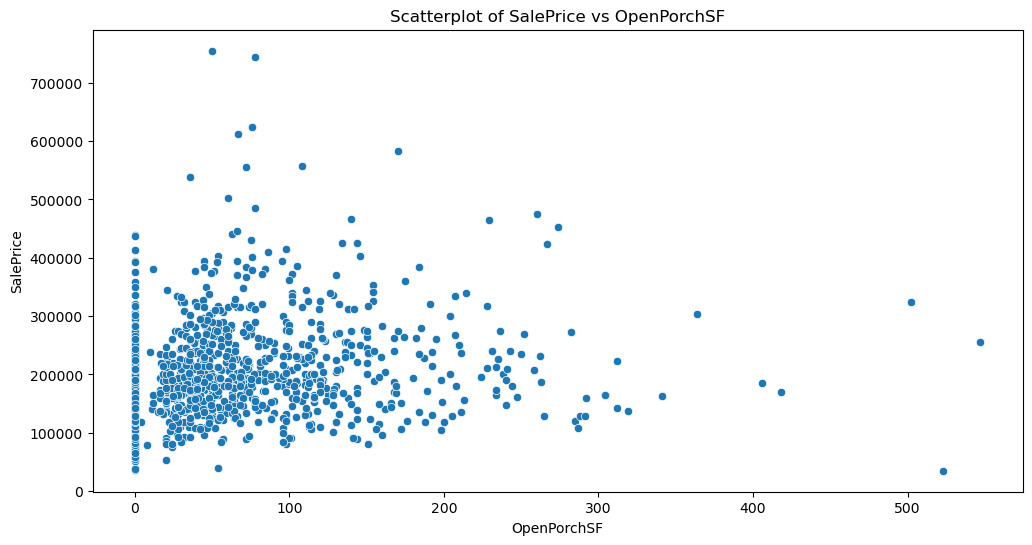

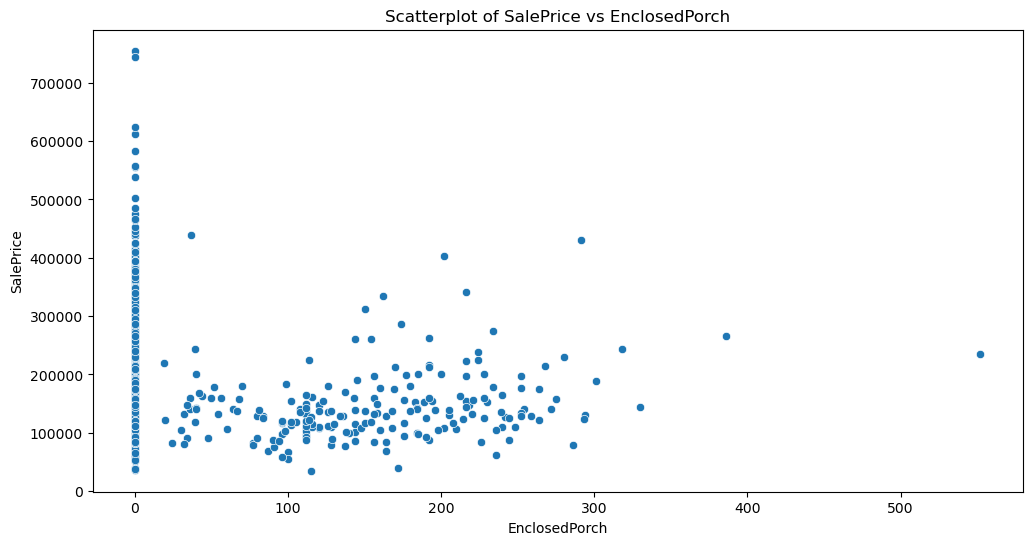

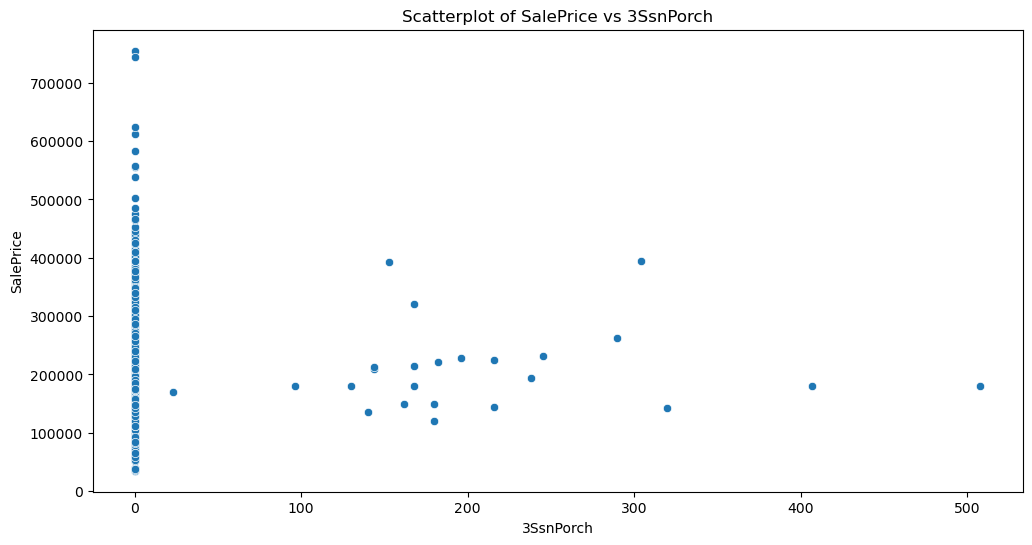

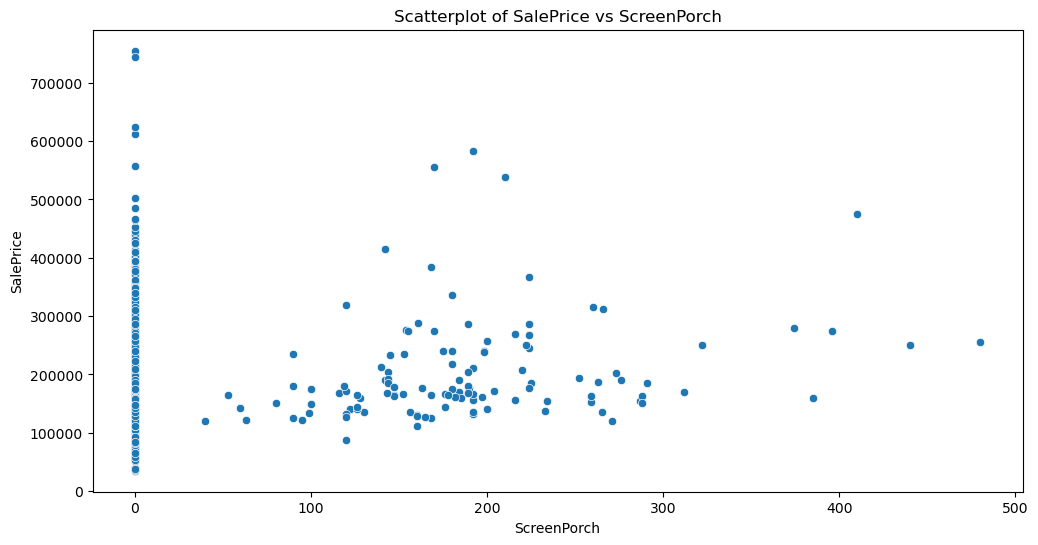

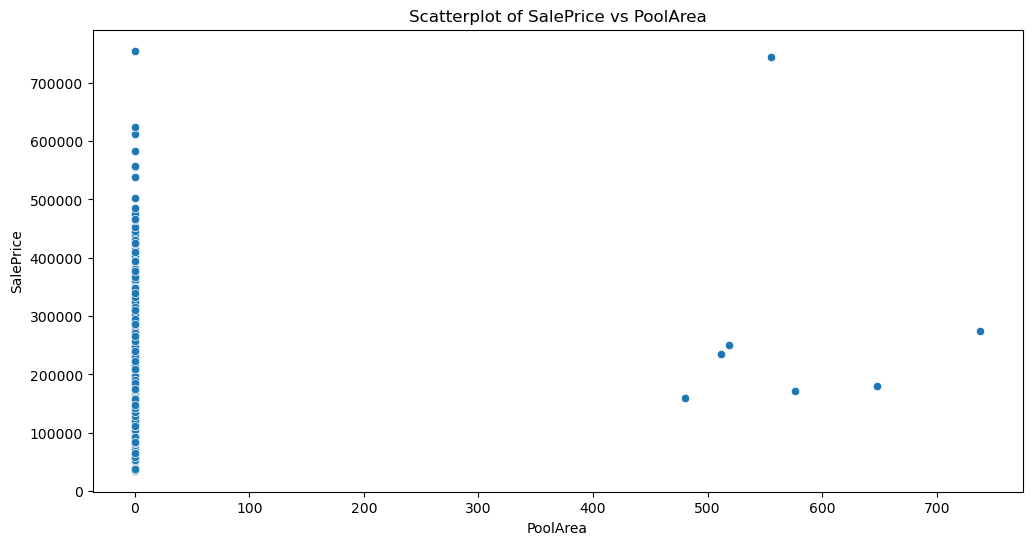

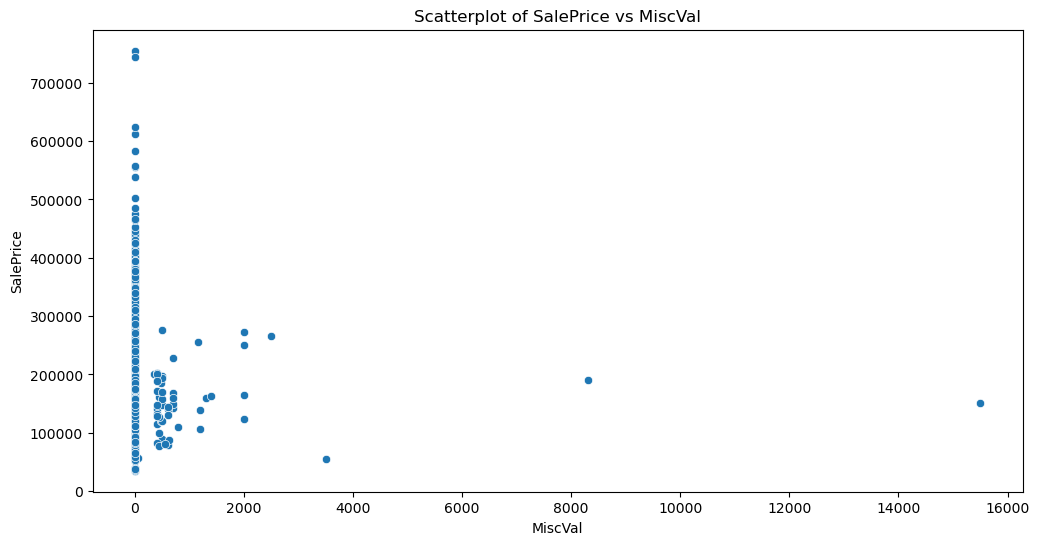

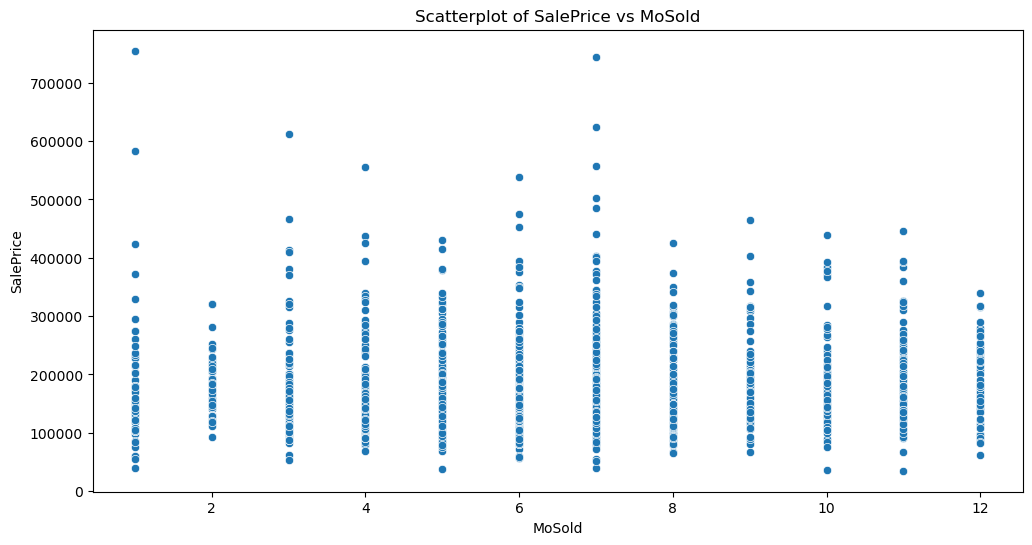

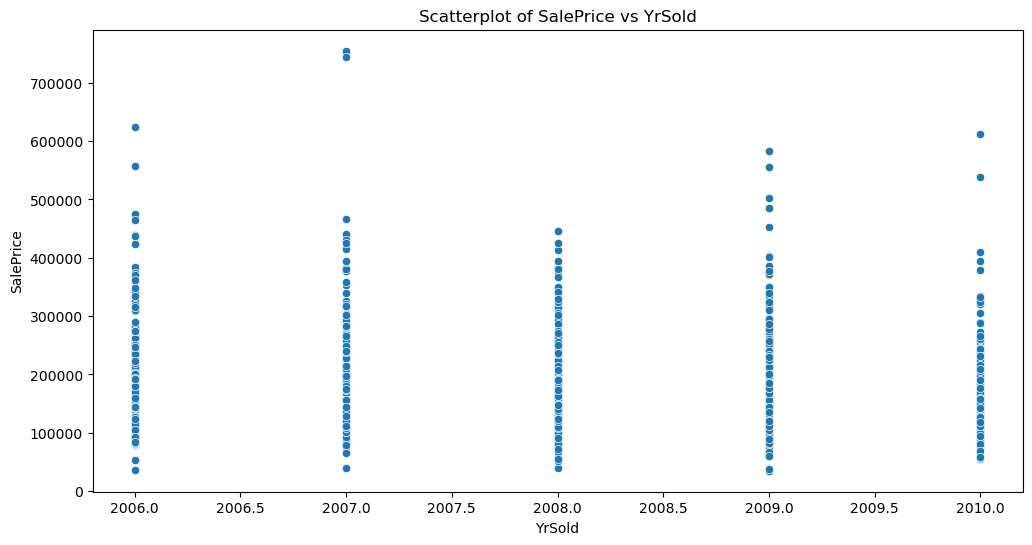

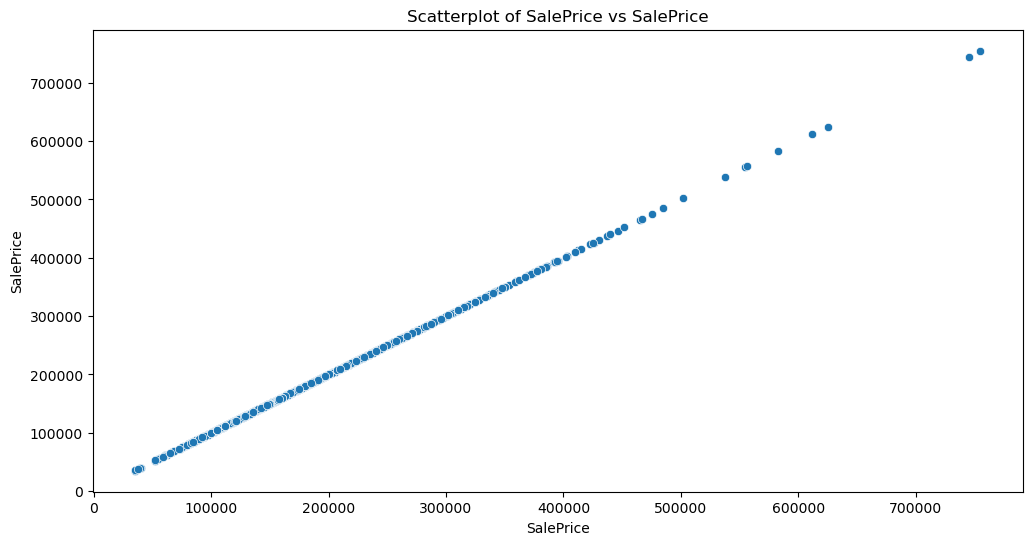

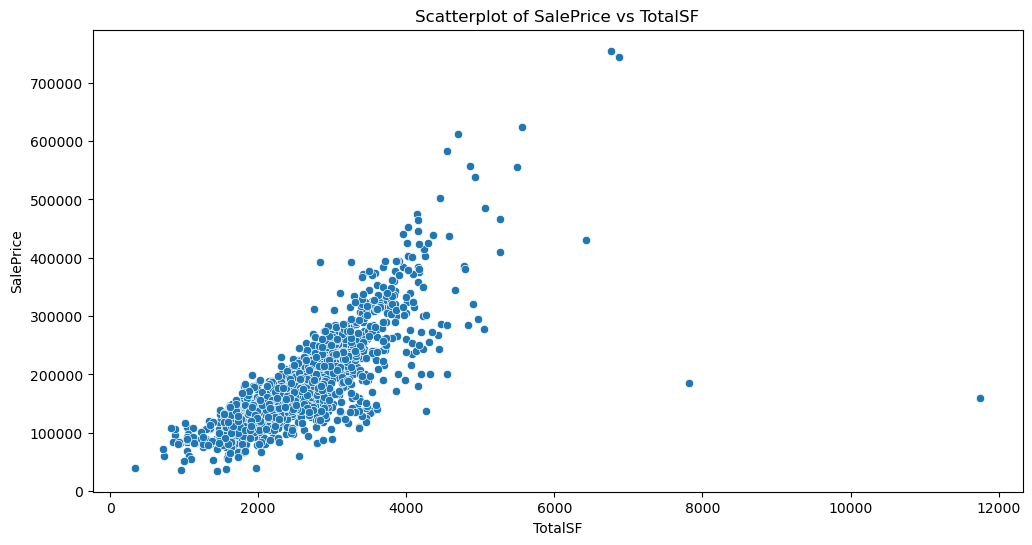

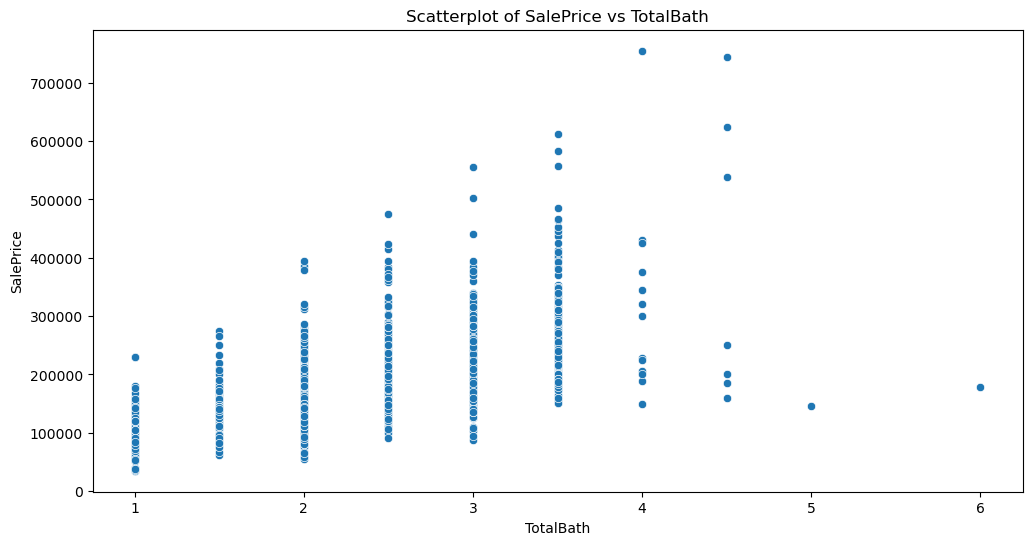

In [18]:
num_cols =df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.title(f"Scatterplot of SalePrice vs {col}")
    plt.show()

By analyzing each scatterplot, we can see which numerical features have a strong positive or negative correlation with SalePrice. Features that have a strong positive correlation with SalePrice will show an upward trend in the scatterplot, while features with a strong negative correlation will show a downward trend. Features that have little to no correlation will show a scattered or random pattern. Some features that appear to have a strong positive correlation with SalePrice based on the scatterplots include:

* OverallQual: The higher the overall quality rating of the house, the higher the sale price.
* GrLivArea: The larger the above ground living area of the house, the higher the sale price.
* GarageCars: The more cars that can fit in the garage, the higher the sale price.
* Features that appear to have a negative correlation with SalePrice include:
* YearBuilt: The older the house, the lower the sale price.
* MSSubClass: The lower the overall material and finish quality of the house, the lower the sale price.

It's important to note that correlation does not always imply causation, and there may be other factors at play that influence the sale price of a house. Nonetheless, these scatterplots are a helpful tool for identifying numerical features that may have a significant impact on the sale price.

# Preparing for modeling :

In [19]:
# Independent variable..

X=df.drop(['Id',"SalePrice"],axis=1)

In [20]:
X.shape

(1460, 76)

In [21]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [22]:
# dependent variable..

y=df['SalePrice']

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Label encoding :
#### One hot encoding

In [24]:
X_dummies=pd.get_dummies(X)

In [25]:
X_dummies.shape

(1460, 272)

In [26]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(34), uint8(234)
memory usage: 767.2 KB


# Splitting the Independent variable and Dependent variable train test :

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_dummies,y,test_size=0.2,random_state=123)

In [29]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",X_test.shape)

X_train: (1168, 272)
y_train: (1168,)
X_test: (292, 272)
y_test: (292, 272)


# Machine learning :

### Logistic Regression :

In [30]:
# Import library from sklearn....
# Import logistic regression..

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

# Import accuracy_score and confusion_matrix..

from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Fit logistic regression on train..

model=lr.fit(X_train,y_train)

In [32]:
# prediction on test..

pred_lr=model.predict(X_test)

In [33]:
pred_lr

array([189000, 140000, 114504, 205000, 145000, 180000, 200000, 125000,
       145000, 115000, 143000, 184000, 155000, 110000, 250000, 160000,
       139600, 315000, 140000, 187500, 125000, 140000,  82000, 139000,
       215000, 110000, 180000, 240000, 129000, 147000, 124000, 110000,
       125000, 110000, 220000, 202500, 145000, 250000, 170000, 115000,
       125000, 318061, 160000, 144500, 160000, 115000, 275000, 160000,
       140000, 115000, 250000, 153500, 145000, 145000, 130000, 165000,
       149900, 180000, 190000, 275000,  82000, 320000, 189000, 180000,
       215000, 135000, 115000, 174000, 110000, 127000, 157000, 235000,
       155000, 190000, 172500, 139000, 155000, 155000, 197000, 120500,
       214000, 555000, 115000, 157000, 280000, 139000, 127000, 154000,
        87000, 228950, 155000, 140000, 178000, 215000, 153000, 140000,
       240000, 115000, 185000, 143000, 135000, 340000, 239000, 139000,
       197000, 135000, 155000, 153500, 114504, 270000, 250000, 160000,
      

In [34]:
# accuracy score of logistic regression..

acc_lr=accuracy_score(pred_lr,y_test)

In [35]:
# Import R2 score..

from sklearn.metrics import r2_score

In [36]:
# R2 score of logistic regression..

r2lr=r2_score(pred_lr,y_test)

In [37]:
print('R2 Score:',r2lr)

R2 Score: -0.3129445970275806


# Decision Tree :

In [38]:
# Import Decision Tree Regressor..

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [39]:
# Fit Decision tree on train..

model_dt=dt.fit(X_train,y_train)

In [40]:
# Prediction on test..

pred_dt=model_dt.predict(X_test)

In [41]:
# R2 score of decision tree..

r2dt=r2_score(pred_dt,y_test)

In [42]:
print("R2 Score:",r2dt)

R2 Score: 0.8235057919409492


# Random Forest :

In [43]:
# Import Random Forest Regressor...

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [44]:
# Fit random forest on train..

model_rf=rf.fit(X_train,y_train)

In [45]:
# Prediction on test..

pred_rf=model_rf.predict(X_test)

In [46]:
# R2 score of random forest..

r2rf=r2_score(pred_rf,y_test)

In [47]:
print("R2 Score:",r2rf)

R2 Score: 0.8612363825150678


# Mean Squared Error :

In [48]:
# Import mean squared error...

from sklearn.metrics import mean_squared_error

In [49]:
# Mean square error of random forest, linear regression and decision tree..

mse_rf=mean_squared_error(pred_rf,y_test)
mse_lr=mean_squared_error(pred_lr,y_test)
mse_dt=mean_squared_error(pred_dt,y_test)


In [50]:
print("Mean squared error:",mse_rf)
print("Mean squared error:",mse_dt)
print("Mean squared error:",mse_lr)

Mean squared error: 655417255.5490127
Mean squared error: 1058337823.1678082
Mean squared error: 3778980459.760274


# Root Mean Square Error :

In [51]:
# Root Mean square error of random forest, linear regression and decision tree..


rmse_rf=np.sqrt(mse_rf)
rmse_dt=np.sqrt(mse_dt)
rmse_lr=np.sqrt(mse_lr)
print("Root mean squared error:",rmse_rf)
print("Root mean squared error:",rmse_dt)
print("Root mean squared error:",rmse_lr)

Root mean squared error: 25601.118248018243
Root mean squared error: 32532.104499521825
Root mean squared error: 61473.41262497369


 Create data frame of R2 score, Mean square error and Root mean square error :

In [52]:
# create data frame..

em=pd.DataFrame({"Algorithm":['lr','dt','rf'],
             "R2 Score":[r2lr,r2dt,r2rf],
             "MSE":[mse_lr,mse_dt,mse_rf],
             "RMSE":[rmse_lr,rmse_dt,rmse_rf]})

In [53]:
print(em)

  Algorithm  R2 Score           MSE          RMSE
0        lr -0.312945  3.778980e+09  61473.412625
1        dt  0.823506  1.058338e+09  32532.104500
2        rf  0.861236  6.554173e+08  25601.118248


### Comparing R2 score of linear regression, decision tree and random forest :

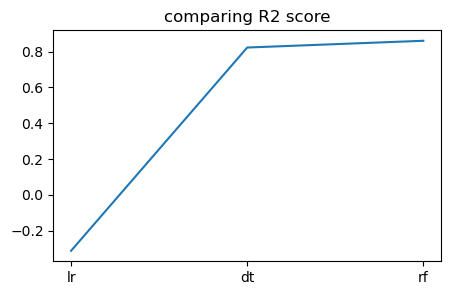

In [54]:
plt.figure(figsize=(5,3))
plt.plot(em["Algorithm"],em['R2 Score'])
plt.title('comparing R2 score')
plt.show()

# Conclussion :

Through our EDA, we have gained a better understanding of the individual variables and their relationships with the sale price. We have identified several key features that are highly correlated with the sale price, including OverallQual, GrLivArea, TotalBsmtSF, GarageCars, and GarageArea. We have also created two new features, TotalSF and TotalBath, that capture the total living area and total number of bathrooms in each house.

Overall, we have observed that the Ames Housing dataset is a rich and complex dataset with many variables and relationships to consider. Our EDA has provided some valuable insights into the data, but there is still much more to explore and analyze.

In conclusion, conducting thorough EDA is an important step in any data analysis project, as it can provide valuable insights and help guide further analysis and modeling.